In [103]:
%load_ext autoreload
%autoreload 2

import re
import os
import glob
import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
directory = '/Users/bzcschae/workspace/leitmotifs/tests/results/noise'
csv_files = glob.glob(os.path.join(directory, '*.csv'))
pattern = r'[\d.]+'

def read_data():
    dataframes = []
    for file in csv_files:
        match = re.search(pattern, file)
        if match:
            extracted_number = match.group()[:-1]
            # print(f"Extracted number: {extracted_number}")
            if not extracted_number:
                extracted_number = 0
            df = pd.read_csv(file, index_col=0)
            df["Noise Level"] = float(extracted_number)*100
            dataframes.append(df)
    
    df = pd.concat(dataframes, ignore_index=True)
    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    return df
    
df = read_data()

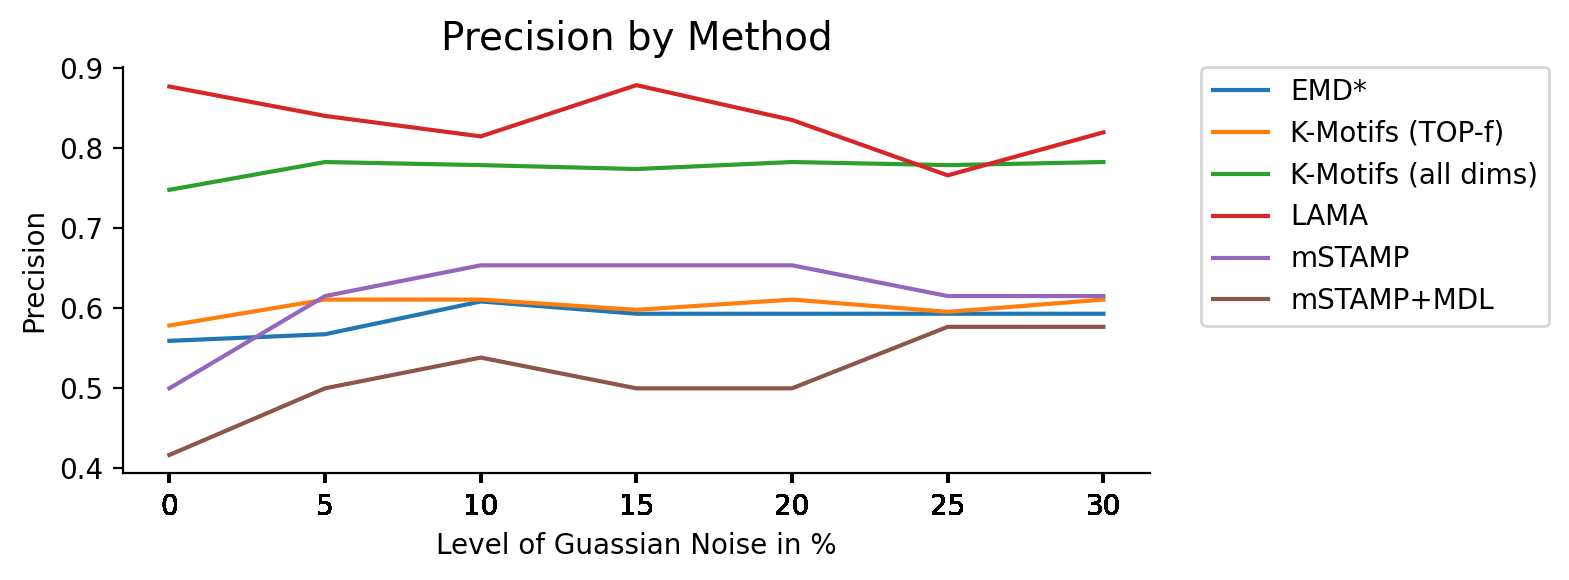

In [111]:
df = read_data()
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

# filter
with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[~df.Method.isin(with_distances)]
df = df.sort_values(by=["Method", "Noise Level"])

fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(hue=df.Method, y=df.Precision, ax=ax, x=df["Noise Level"], ci=None, estimator=np.mean,
            #order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"]
           )
ax.set_title("Precision by Method", fontsize=14)
plt.xticks(df["Noise Level"])

plt.yticks(fontsize=10)
# plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("Level of Guassian Noise in %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision.pdf")

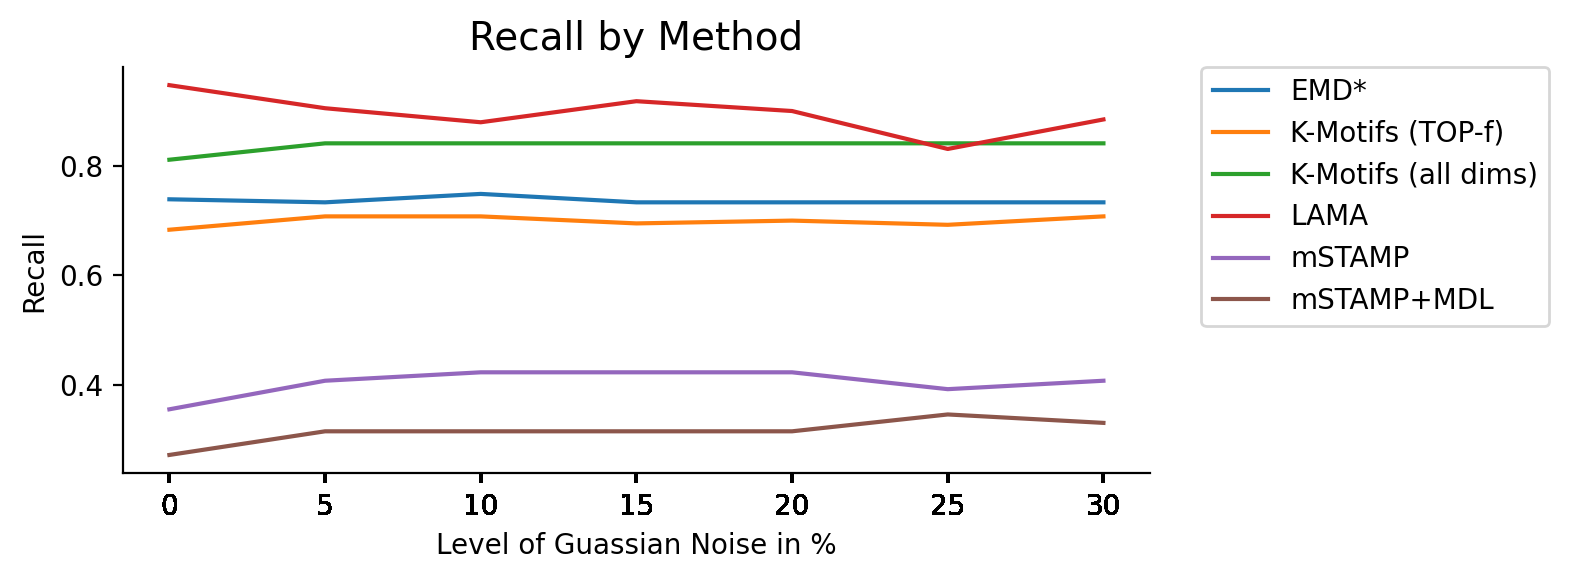

In [112]:
fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(hue=df.Method, y=df.Recall, ax=ax, x=df["Noise Level"], ci=None, estimator=np.mean,
            #order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"]
            )
ax.set_title("Recall by Method", fontsize=14)
plt.xticks(df["Noise Level"])

plt.yticks(fontsize=10)
# plt.xticks(rotation=-10, fontsize=10, ha='left')
plt.xlabel("Level of Guassian Noise in %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall.pdf")

In [107]:
df.groupby([df.Method, df["Noise Level"]])[["Precision", "Recall"]].agg(["mean"])

Precision    Recall
                                     mean      mean
Method              Noise Level                    
EMD*                5.0          0.567628  0.733333
                    10.0         0.608654  0.748718
                    15.0         0.593269  0.733333
                    20.0         0.593269  0.733333
                    25.0         0.593269  0.733333
                    30.0         0.593269  0.733333
K-Motifs (TOP-f)    5.0          0.610989  0.707692
                    10.0         0.610989  0.707692
                    15.0         0.598168  0.694872
                    20.0         0.610989  0.700000
                    25.0         0.595604  0.692308
                    30.0         0.610989  0.707692
K-Motifs (all dims) 5.0          0.783013  0.841026
                    10.0         0.779167  0.841026
                    15.0         0.774272  0.841026
                    20.0         0.783013  0.841026
                    25.0         0.779167  0.841026
                    30.0         0.783013  0.841026
LAMA                5.0          0.840705  0.905128
                    10.0         0.815064  0.879487
                    15.0         0.879167  0.917949
                    20.0         0.835577  0.900000
                    25.0         0.766346  0.830769
                    30.0         0.820192  0.884615
mSTAMP              5.0          0.615385  0.407692
                    10.0         0.653846  0.423077
                    15.0         0.653846  0.423077
                    20.0         0.653846  0.423077
                    25.0         0.615385  0.392308
                    30.0         0.615385  0.407692
mSTAMP+MDL          5.0          0.500000  0.315385
                    10.0         0.538462  0.315385
                    15.0         0.500000  0.315385
                    20.0         0.500000  0.315385
                    25.0         0.576923  0.346154
                    30.0         0.576923  0.330769

In [102]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 0.591560 & 0.650000 & 0.735897 & 0.800000 \\
K-Motifs (TOP-f) & 0.606288 & 0.700000 & 0.701709 & 1.000000 \\
K-Motifs (all dims) & 0.780274 & 1.000000 & 0.841026 & 1.000000 \\
LAMA & 0.826175 & 1.000000 & 0.886325 & 1.000000 \\
mSTAMP & 0.634615 & 1.000000 & 0.412821 & 0.366667 \\
mSTAMP+MDL & 0.532051 & 0.750000 & 0.323077 & 0.200000 \\
\bottomrule
\end{tabular}



In [49]:
print(df.groupby([df.Method, df["Noise Level"]])[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

|                                 |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:--------------------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| ('EMD*', '0.05')                |                0.567628 |                  0.6      |             0.733333 |               0.8      |
| ('EMD*', '0.1')                 |                0.608654 |                  0.666667 |             0.748718 |               0.8      |
| ('EMD*', '0.15')                |                0.593269 |                  0.65     |             0.733333 |               0.8      |
| ('EMD*', '0.2')                 |                0.593269 |                  0.65     |             0.733333 |               0.8      |
| ('EMD*', '0.25')                |                0.593269 |                  0.65     |             0.733333 |               0.8      |
| ('K-Motifs (TOP-f)', '0.05')    